# Homework 10

**Enter your Name:**  Thomas Lu
    
**Enter your PID:**  thomaslu
    
I have neither given nor received unauthorized assistance on this assignment.

In [1]:
# Run this cell first.  Do NOT edit this cell.
Answer1 = Answer2 = Answer3 = Answer4 = Answer5 = None
import pandas
import numpy
import matplotlib.pyplot
import nose.tools
%matplotlib inline
# Data files:
data = pandas.read_csv('VT_tweets_2018_100K.csv').sort_values('datetime')
positives = set(open('positive.txt').read().splitlines())
negatives = set(open('negative.txt').read().splitlines())

*In this Homework you will conduct a sentiment analysis of the above VT twitter data to identify interesting events.*

**Problem 1.** Analyze the tweet content by representing each tweet as a "bag of words". 

First, clean the tweet text by lowering any capitalization, and eliminating (replace with space char) all of the following 17 punctuation marks:  `.,!?:;"'-~()[]|/\`

Then, split words by whitespace, and eliminate any words that are not all alpha (hint: string.isalpha( )).

In Answer1, return a 6-tuple containing the following information:
(the mean number of words per tweet,
 the list of words in the first tweet, 
 the tweet text for the first-occuring fewest-word tweet, and its number of words, 
 the tweet text for the first-occuring most-word tweet, and its number of words).


In [2]:
# Problem 1
# YOUR CODE HERE
#raise NotImplementedError()

data['clean'] = data.tweet.str.lower()

for p in ".,!?:;\"'-~()[]|/\\":
    data['clean'] = data['clean'].str.replace(p,' ')
data['words'] = data.clean.apply(lambda t:
                [w for w in t.split() if w.isalpha()])
total = 0
maxtweetcount = 1
mintweetcount = 10
for i in range(len(data.words)):
    total = total + len(data['words'][i])
    if(len(data['words'][i]) > maxtweetcount):
        maxtweetcount = len(data['words'][i])
        tweetmax = data.tweet[i]
    if(len(data['words'][i]) < mintweetcount):
        mintweetcount = len(data['words'][i])
        tweetmin = data.tweet[i]
average = total/len(data.words)
Answer1 = [average, data['words'][0], tweetmin, mintweetcount, tweetmax, maxtweetcount]
Answer1 = tuple(Answer1)
Answer1

(16.64741246105393,
 ['over', 'was', 'virginia', 'tech', 'syracuse'],
 '@virginianpilot @virginia @vpostrel @virginia_tech',
 0,
 'I wake up and think "Oh god it wasn\'t just a dream. Caleb is actually dead" and I get up and go to work.I\'m at V https://t.co/2v3i4DCfhy',
 32)

In [3]:
# Problem 1 autograder -- run me
nose.tools.assert_is_instance(Answer1, tuple)
nose.tools.assert_equal(len(Answer1), 6)
nose.tools.assert_almost_equal(Answer1[0], 16.64741246105393, delta=0.0001)
nose.tools.assert_list_equal(sorted(list(Answer1[1])), 
                ['over', 'syracuse', 'tech', 'virginia', 'was'])
# autograder hidden tests
'passed'

'passed'

**Problem 2.**  Analyze the tweet sentiments.  Compute the sentiment for each tweet, which is defined as the positive sentiment minus the negative sentiment. 
The positive and negative sentiment are defined as the count of (non-unique) positive or negative whole words (not parts of words) in the tweet, using the provided positive and negative word lists.

In Answer2, return a 5-tuple containing: 
(the mean sentiment, mean positive sentiment, and mean negative sentiment of the tweets, 
 the tweet text for the highest sentiment tweet, and its sentiment value).

In [4]:
### Problem 2
# YOUR CODE HERE
#raise NotImplementedError()
data['positive'] = data.words.apply(lambda words:
                                   len([True for w in words if w in positives]))
data['negative'] = data.words.apply(lambda words:
                                   len([True for w in words if w in negatives]))
a = data['positive']
b = data['negative']
#data['sentiment'] = [a - b for a, b in zip(a,b)]
data['sentiment'] = data['positive'] - data['negative']

m = max(data.sentiment)
'''
count = 0
for i in data.sentiment:
    count = count + 1
    if(i == m):
        idvalue = count
        break
'''
maxtweet = data.iloc[data.sentiment.idxmax(), 0]
Answer2 = [data.sentiment.mean(), a.mean(), b.mean(), maxtweet, m]
Answer2 = tuple(Answer2)
Answer2

(0.17474859203093732,
 0.5073332601555309,
 0.33258466812459364,
 'RT @marchmadness: Grayson Allen had himself a game.His 25 points (7 threes) lead No. 12 Duke to 74-52 rout of Virginia Tech. https://t.co',
 8)

In [5]:
# Problem 2 autograder -- run me
nose.tools.assert_is_instance(Answer2, tuple)
nose.tools.assert_equal(len(Answer2), 5)
nose.tools.assert_almost_equal(Answer2[0], 0.17474859203093732, delta=0.0001)
nose.tools.assert_equal(Answer2[4], 8) 
# autograder hidden tests
'passed'

'passed'

**Problem 3.**  Analyze the sentiment trends.  Compute the mean tweet sentiments for each date. Hint: you can extract the first 10 characters from the 'datetime' column to obtain the date.

Visualize the the means of the sentiment, positive sentiment, and negative sentiment for each date as a timeseries plot with 3 lines.  Use an appropriate color scheme, and labeled axes.

In Answer3, return a Pandas Series containing the mean sentiments, indexed and sorted by increasing date.

Think: What interesting things do you notice in the plot?

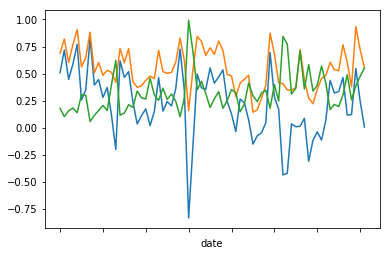

In [6]:
# Problem 3
# YOUR CODE HERE
#raise NotImplementedError()
data['date'] = data.datetime.str[:10]
meansent = data.groupby(by='date').sentiment.mean()
meanpos = data.groupby(by='date').positive.mean()
meanneg = data.groupby(by='date').negative.mean()
meansent.plot()
meanpos.plot()
meanneg.plot()

Answer3 = meansent

In [7]:
# Problem 3 autograder -- run me
nose.tools.assert_is_instance(Answer3, pandas.Series)
nose.tools.assert_equal(len(Answer3), 72)
nose.tools.assert_true(Answer3.index.is_monotonic_increasing)
nose.tools.assert_almost_equal(Answer3.iloc[0], 0.507607, delta=0.0001)
nose.tools.assert_almost_equal(Answer3.iloc[-1], 0.005040, delta=0.0001)
# autograder hidden tests
'passed'

'passed'

**Problem 4.**  After seeing the deep valley in the plot, analyze which date has the lowest mean sentiment, and what happened on that date? 
To explain what likely happened that day, analyze the tweets on that date to identify the most frequently occuring words.

In Answer4, return a Pandas Series of the highest 100 word frequencies on that date, indexed by word, sorted by decreasing frequency. The series should be named with the date in string form 'year-mm-dd'.

In [8]:
# Problem 4
# YOUR CODE HERE
#raise NotImplementedError()
arr4 = []
merged = []
lowest = Answer3.idxmin()
for i in range(len(data['date'])):
    if(data['date'][i] == lowest):
        arr4.append(data['words'][i])
for i in arr4:
    merged += i
freqTable = pandas.DataFrame()
freqTable['keys'] = merged
freq = freqTable.apply(lambda bag: pandas.Series(bag).value_counts())
freq
temp3 = pandas.Series(freq['keys'], name=lowest)
temp3 = temp3[0:100]
Answer4 = temp3
Answer4

virginia      3230
tech          3150
rt            2696
to            2451
t             1953
co            1898
https         1879
student       1759
of            1677
arrested      1630
assault       1508
a             1279
rounds        1277
at            1266
buy           1218
and           1133
trying         996
police         921
had            906
w              906
was            841
ammo           839
after          777
rifle          763
he             740
the            661
is             544
rifles         535
non            517
citizen        513
              ... 
cop            157
has            150
freshman       143
attempted      138
on             125
ammunition     125
game           123
by             122
illegally      121
possessing     115
that           113
possession     113
charged        102
college         98
it              94
last            90
former          88
state           86
having          86
accused         85
i               84
via         

In [9]:
# Problem 4 autograder -- run me
nose.tools.assert_is_instance(Answer4, pandas.Series)
nose.tools.assert_equal(len(Answer4), 100)
nose.tools.assert_true(Answer4.is_monotonic_decreasing)
nose.tools.assert_regex(Answer4.name, '2018-0[1-3]-[0-3][0-9]')
nose.tools.assert_equal(Answer4['virginia'], 3230)
# autograder hidden tests
'passed'

'passed'

**Problem 5.**  After seeing the suspicous word 'arrested' on that date, now zoom in to specific tweets to figure out what happened that day.

In Answer5, return the tweet text of the first tweet to mention that word (according to the bag of words representation) on that day.

Think: Can you find news stories that verify that event?

In [18]:
# Problem 5
# YOUR CODE HERE
#raise NotImplementedError()
lowest = Answer3.idxmin()
arrestDate = data[data['date'] == lowest].reset_index()
ind = -1
for i in range(len(arrestDate['words'])):
    if(ind == -1):
        if("arrested" in arrestDate['words'][i]):
            ind = i 
Answer5 = arrestDate['tweet'][ind]
Answer5

'#studentvisa Reports: Virginia Tech freshman arrested for illegally possessing an assault-style rifle https://t.co/17sfro2nEH via @rtdnews'

In [19]:
# Problem 5 autograder -- run me
nose.tools.assert_is_instance(Answer5, str)
# autograder hidden tests
'passed'

'passed'

In [ ]:
# scratch space
